**dependencies**

In [1]:
pip install librosa numpy matplotlib scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.1/260.1 kB 1.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.6/64.6 kB 421.1 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.4/156.4 kB 6.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Difference Percentage: 0.00%


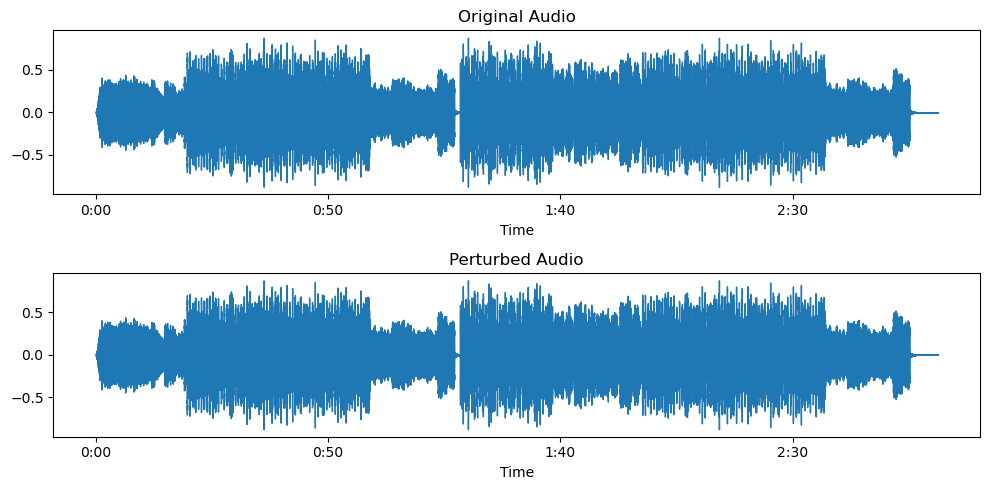

In [5]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Function to load audio and resample if necessary
def load_audio(filename, target_sr=16000):
    y, sr = librosa.load(filename, sr=target_sr)
    return y, sr

# Function to compute percentage difference between original and perturbed signals
def calculate_difference_percentage(original, perturbed):
    # Ensure both signals are of the same length
    min_length = min(len(original), len(perturbed))
    original = original[:min_length]
    perturbed = perturbed[:min_length]
    
    # Calculate the absolute difference
    diff = np.abs(original - perturbed)
    
    # Calculate the percentage difference based on amplitude
    percentage_diff = (np.sum(diff) / np.sum(np.abs(original))) * 100
    return percentage_diff

# Function to visualize the original and perturbed waveforms
def visualize_waveforms(original, perturbed, sr):
    plt.figure(figsize=(10, 5))

    plt.subplot(2, 1, 1)
    plt.title("Original Audio")
    librosa.display.waveshow(original, sr=sr)

    plt.subplot(2, 1, 2)
    plt.title("Perturbed Audio")
    librosa.display.waveshow(perturbed, sr=sr)

    plt.tight_layout()
    plt.show()

# Function to compare and visualize differences
def compare_audio(original_file, perturbed_file):
    # Load both audio files
    original, sr1 = load_audio(original_file)
    perturbed, sr2 = load_audio(perturbed_file)
    
    # Ensure both audios have the same sample rate
    assert sr1 == sr2, "Sample rates do not match!"
    
    # Calculate the difference percentage
    diff_percentage = calculate_difference_percentage(original, perturbed)
    print(f"Difference Percentage: {diff_percentage:.2f}%")
    
    # Visualize both waveforms
    visualize_waveforms(original, perturbed, sr1)

# Example usage
original_wav = '/Users/lennox/Documents/machineLearning/research/musicMask/Westy - KING OF THE NIGHT.wav'
perturbed_wav = '/Users/lennox/Documents/machineLearning/research/musicMask/Westy - KING OF THE NIGHT.wav'

compare_audio(original_wav, perturbed_wav)
